In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mcolors
import xarray as xr

In [3]:
#Opening data for runs with different values of Coriolis parameter f. Nominal value is f=1.43e-04.
%cd /work/eay/MITgcm_HR/exp1/ 
#2/8*f=0.3575e-4
ds1 = xr.open_mfdataset('state1hr.nc');
%cd /work/eay/MITgcm_HR/exp2 
#3/8*f=0.536e-4
ds2 = xr.open_mfdataset('state1hr.nc');
%cd /work/eay/MITgcm_HR/HR4_lowf 
#4/8*f=0.715e-4
dslow = xr.open_mfdataset('state1hr.nc');

%cd /work/eay/MITgcm_HR/exp3 
#5/8*f=0.89e-4
ds3 = xr.open_mfdataset('state1hr.nc');
%cd /work/eay/MITgcm_HR/exp4 
#6/8*f=1.07e-4
ds4 = xr.open_mfdataset('state1hr.nc');
%cd /work/eay/MITgcm_HR/exp5 
#7/8*f=1.25e-4
ds5 = xr.open_mfdataset('state1hr.nc');

%cd /work/eay/MITgcm_HR/HR4_original 
#2/8*f=1.43e-4
dsOG = xr.open_mfdataset('state1hr.nc');
%cd ../
%pwd
print(ds1)



/work2/eay/MITgcm_HR/exp1
/work2/eay/MITgcm_HR/exp2
/work2/eay/MITgcm_HR/HR4_lowf
/work2/eay/MITgcm_HR/exp3
/work2/eay/MITgcm_HR/exp4
/work2/eay/MITgcm_HR/exp5
/work2/eay/MITgcm_HR/HR4_original
/work2/eay/MITgcm_HR
<xarray.Dataset>
Dimensions:  (T: 481, X: 2560, Xp1: 2561, Y: 1, Yp1: 2, Z: 480, Zl: 480)
Coordinates:
  * Xp1      (Xp1) float64 7.105e-15 28.12 56.24 ... 7.496e+04 7.499e+04
  * Y        (Y) float64 10.0
  * Z        (Z) float64 -1.649 -4.948 -8.247 ... -2.472e+03 -2.483e+03
  * X        (X) float64 14.06 42.18 70.3 ... 7.491e+04 7.494e+04 7.498e+04
  * Yp1      (Yp1) float64 0.0 20.0
  * Zl       (Zl) float64 0.0 -3.299 -6.597 ... -2.456e+03 -2.467e+03 -2.478e+03
  * T        (T) float64 5.184e+06 5.188e+06 5.191e+06 ... 6.908e+06 6.912e+06
Data variables:
    iter     (T) int32 dask.array<shape=(481,), chunksize=(481,)>
    U        (T, Z, Y, Xp1) float32 dask.array<shape=(481, 480, 1, 2561), chunksize=(481, 480, 1, 2561)>
    V        (T, Z, Yp1, X) float32 dask.array<s

In [4]:
# $Header: /u/gcmpack/MITgcm/utils/python/MITgcmutils/MITgcmutils/jmd95.py,v 1.1 2012/10/25 23:31:30 jahn Exp $
# $Name:  $
#
# created by mlosch on 2002-08-09
# converted to python by jahn on 2010-04-29

import sys
import numpy as np

__doc__ = """
Density of Sea Water using Jackett and McDougall 1995 (JAOT 12) polynomial
Functions:
dens :: computes in-situ density from salinity, potential temperature
        and pressure
"""

# coefficients nonlinear equation of state in pressure coordinates for
# 1. density of fresh water at p = 0
eosJMDCFw = [ 999.842594,
              6.793952e-02,
           -  9.095290e-03,
              1.001685e-04,
           -  1.120083e-06,
              6.536332e-09,
            ]
# 2. density of sea water at p = 0
eosJMDCSw = [     8.244930e-01,
               -  4.089900e-03,
                  7.643800e-05,
               -  8.246700e-07,
                  5.387500e-09,
               -  5.724660e-03,
                  1.022700e-04,
               -  1.654600e-06,
                  4.831400e-04,
            ]
# coefficients in pressure coordinates for
# 3. secant bulk modulus K of fresh water at p = 0
eosJMDCKFw = [    1.965933e+04,
                  1.444304e+02,
                - 1.706103e+00,
                  9.648704e-03,
                - 4.190253e-05,
             ]
# 4. secant bulk modulus K of sea water at p = 0
eosJMDCKSw = [    5.284855e+01,
                - 3.101089e-01,
                  6.283263e-03,
                - 5.084188e-05,
                  3.886640e-01,
                  9.085835e-03,
                - 4.619924e-04,
             ]
# 5. secant bulk modulus K of sea water at p
eosJMDCKP = [     3.186519e+00,
                  2.212276e-02,
                - 2.984642e-04,
                  1.956415e-06,
                  6.704388e-03,
                - 1.847318e-04,
                  2.059331e-07,
                  1.480266e-04,
                  2.102898e-04,
                - 1.202016e-05,
                  1.394680e-07,
                - 2.040237e-06,
                  6.128773e-08,
                  6.207323e-10,
            ]

def densjmd95(s,theta,p):
    """
    densjmd95    Density of sea water
   =========================================================================
    USAGE:  dens = densjmd95(s,theta,p)
    DESCRIPTION:
       Density of Sea Water using Jackett and McDougall 1995 (JAOT 12)
       polynomial (modified UNESCO polynomial).
    INPUT:  (all must have same dimensions)
      S     = salinity    [psu      (PSS-78)]
      Theta = potential temperature [degree C (IPTS-68)]
      P     = pressure    [dbar]
          (P may have dims 1x1, mx1, 1xn or mxn for S(mxn) )
    OUTPUT:
      dens = density  [kg/m^3]
    AUTHOR:  Martin Losch 2002-08-09  (mlosch@mit.edu)
    check value
    S     = 35.5 PSU
    Theta = 3 degC
    P     = 3000 dbar
    rho   = 1041.83267 kg/m^3
    Jackett and McDougall, 1995, JAOT 12(4), pp. 381-388
    """

    # make sure arguments are floating point
    s = np.asfarray(s)
    t = np.asfarray(theta)
    p = np.asfarray(p)

    # convert pressure to bar
    p = .1*p

    t2 = t*t
    t3 = t2*t
    t4 = t3*t

    if np.any(s<0):
        sys.stderr.write('negative salinity values! setting to nan\n')

            
    s3o2 = s*np.sqrt(s)

    # density of freshwater at the surface
    rho = ( eosJMDCFw[0]
          + eosJMDCFw[1]*t
          + eosJMDCFw[2]*t2
          + eosJMDCFw[3]*t3
          + eosJMDCFw[4]*t4
          + eosJMDCFw[5]*t4*t
          )
    # density of sea water at the surface
    rho = ( rho
           + s*(
                 eosJMDCSw[0]
               + eosJMDCSw[1]*t
               + eosJMDCSw[2]*t2
               + eosJMDCSw[3]*t3
               + eosJMDCSw[4]*t4
               )
           + s3o2*(
                 eosJMDCSw[5]
               + eosJMDCSw[6]*t
               + eosJMDCSw[7]*t2
               )
           + eosJMDCSw[8]*s*s
          )

    rho = rho / (1. - p/bulkmodjmd95(s,t,p))

    return rho


def bulkmodjmd95(s,theta,p):
    """ bulkmod = bulkmodjmd95(s,theta,p)
    """
    # make sure arguments are floating point
    s = np.asfarray(s)
    t = np.asfarray(theta)
    p = np.asfarray(p)

    t2 = t*t
    t3 = t2*t
    t4 = t3*t

    s3o2 = s*np.sqrt(s)

    #p = pressure(i,j,k,bi,bj)*SItoBar
    p2 = p*p
    # secant bulk modulus of fresh water at the surface
    bulkmod = ( eosJMDCKFw[0]
              + eosJMDCKFw[1]*t
              + eosJMDCKFw[2]*t2
              + eosJMDCKFw[3]*t3
              + eosJMDCKFw[4]*t4
              )
    # secant bulk modulus of sea water at the surface
    bulkmod = ( bulkmod
              + s*(      eosJMDCKSw[0]
                       + eosJMDCKSw[1]*t
                       + eosJMDCKSw[2]*t2
                       + eosJMDCKSw[3]*t3
                       )
              + s3o2*(   eosJMDCKSw[4]
                       + eosJMDCKSw[5]*t
                       + eosJMDCKSw[6]*t2
                       )
               )
    # secant bulk modulus of sea water at pressure p
    bulkmod = ( bulkmod
              + p*(   eosJMDCKP[0]
                    + eosJMDCKP[1]*t
                    + eosJMDCKP[2]*t2
                    + eosJMDCKP[3]*t3
                  )
              + p*s*(   eosJMDCKP[4]
                      + eosJMDCKP[5]*t
                      + eosJMDCKP[6]*t2
                    )
              + p*s3o2*eosJMDCKP[7]
              + p2*(   eosJMDCKP[8]
                     + eosJMDCKP[9]*t
                     + eosJMDCKP[10]*t2
                   )
              + p2*s*(  eosJMDCKP[11]
                      + eosJMDCKP[12]*t
                      + eosJMDCKP[13]*t2
                     )
               )

    return bulkmod

dens = densjmd95

In [5]:
g=9.81; rho_o=1028.00; f=1.43e-4;
xq=ds1['X']
zl=ds1['Zl']
dx=np.diff(xq); dxmat=np.tile(dx,[435,1])
dz=np.diff(zl[45:480]); dzmat=np.tile(dz,[2560,1]); dzmat=np.transpose(dzmat)

NT=480
EPVsum1=np.zeros(NT); EPVneg1=np.zeros(NT); EPVp1=np.zeros(NT); EPVpp1=np.zeros(NT); EPVppp1=np.zeros(NT);
EPVsum2=np.zeros(NT); EPVneg2=np.zeros(NT); EPVp2=np.zeros(NT); EPVpp2=np.zeros(NT); EPVppp2=np.zeros(NT);
EPVsum3=np.zeros(NT); EPVneg3=np.zeros(NT); EPVp3=np.zeros(NT); EPVpp3=np.zeros(NT); EPVppp3=np.zeros(NT);
EPVsum4=np.zeros(NT); EPVneg4=np.zeros(NT); EPVp4=np.zeros(NT); EPVpp4=np.zeros(NT); EPVppp4=np.zeros(NT);
EPVsum5=np.zeros(NT); EPVneg5=np.zeros(NT); EPVp5=np.zeros(NT); EPVpp5=np.zeros(NT); EPVppp5=np.zeros(NT);
EPVsumOG=np.zeros(NT); EPVnegOG=np.zeros(NT);EPVpOG=np.zeros(NT); EPVppOG=np.zeros(NT); EPVpppOG=np.zeros(NT);
EPVsumlow=np.zeros(NT); EPVneglow=np.zeros(NT);EPVplow=np.zeros(NT); EPVpplow=np.zeros(NT); EPVppplow=np.zeros(NT);

#Creating topography mask
#mask=np.array(salt1[0,:,:]); mask[mask>0]=np.nan; mask[mask==0]=1.0


In [6]:
var1 = [EPVsum1,EPVsum2,EPVsum3,EPVsum4,EPVsum5,EPVsumOG,EPVsumlow]
var2 = [EPVneg1,EPVneg2,EPVneg3,EPVneg4,EPVneg5,EPVnegOG,EPVneglow]
pt1  = [EPVp1,EPVp2,EPVp3,EPVp4,EPVp5,EPVpOG,EPVplow]
pt2  = [EPVpp1,EPVpp2,EPVpp3,EPVpp4,EPVpp5,EPVppOG,EPVpplow]
pt3  = [EPVppp1,EPVppp2,EPVppp3,EPVppp4,EPVppp5,EPVpppOG,EPVppplow]
file = [ds1,ds2,ds3,ds4,ds5,dsOG,dslow]
for j in range(0,7):
    salt=np.squeeze(file[j].S)
    temp=np.squeeze(file[j].Temp)
    v=np.squeeze(file[j].V[:,:,0,:])
    for i in range (0,NT):
        tempi=np.array(temp[i,45:480,:]); #45:480 in z removes the uppermost 150m of the watercolumn !!
        salti=np.array(salt[i,45:480,:]); 
        vi=np.squeeze(np.array(v[i,45:480,:]))
        dens = densjmd95(salti,tempi,0)
        dens[salti==0]=np.nan;
        vi[salti==0]=np.nan;

        drhodx=np.diff(dens,axis=1)/dxmat
        drhodz=np.diff(dens,axis=0)/dzmat
        dvdx=np.diff(vi,axis=1)/dxmat
        dvdz=np.diff(vi,axis=0)/dzmat

        drhodx=drhodx[0:434,0:2559];
        drhodz=drhodz[0:434,0:2559];
        dvdx=dvdx[0:434,0:2559];
        dvdz=dvdz[0:434,0:2559];
        EPV=(g/rho_o)*(drhodx*dvdz)-(g/rho_o)*drhodz*(dvdx+f)
        var1[j][i]=np.nansum(EPV)
        var2[j][i]=np.nansum(EPV[EPV<0])
        pt1[j][i]= EPV[355,1430]#[400,1430] if including top 45 points
        pt2[j][i]= EPV[355,1480]#[400,1480]
        pt3[j][i]= EPV[355,1530]#[400,1530]
    print(j)

/nbhome/eay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in less


0
1
2
3
4
5
6


(60, 80)

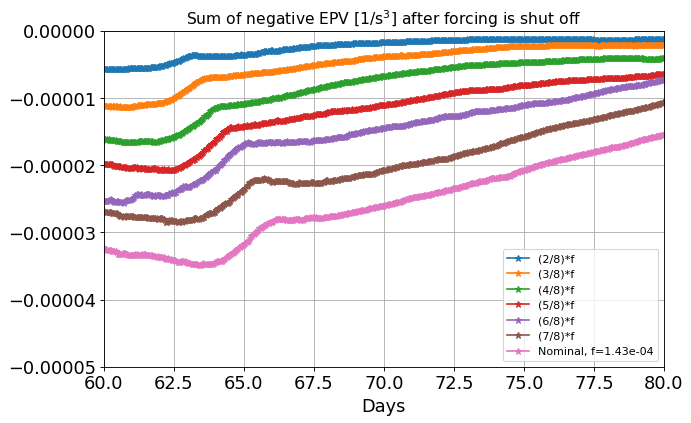

In [43]:
#plt.clear()
fig = plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)


plt.plot(np.linspace(60,80,480),var2[0][0:480],'-*')
plt.plot(np.linspace(60,80,480),var2[1][0:480],'-*')
plt.plot(np.linspace(60,80,480),var2[6][0:480],'-*')
plt.plot(np.linspace(60,80,480),var2[2][0:480],'-*')
plt.plot(np.linspace(60,80,480),var2[3][0:480],'-*')
plt.plot(np.linspace(60,80,480),var2[4][0:480],'-*')
plt.plot(np.linspace(60,80,480),var2[5][0:480],'-*')

plt.grid()
ax1.set_xlabel('Days',fontsize=16); 
ax1.tick_params(labelsize=16); #ax2.tick_params(labelsize=12);
ax1.set_title('Sum of negative EPV [1/s$^3$] after forcing is shut off', fontsize=14)
ax1.legend(['(2/8)*f','(3/8)*f','(4/8)*f','(5/8)*f','(6/8)*f','(7/8)*f','Nominal, f=1.43e-04'])
ax1.set_ylim(-0.00005,0)
#ax1.set_ylim(0.0002,0.001)
ax1.set_xlim(60,80)
#plt.savefig('index%.3d'%i)


(60, 80)

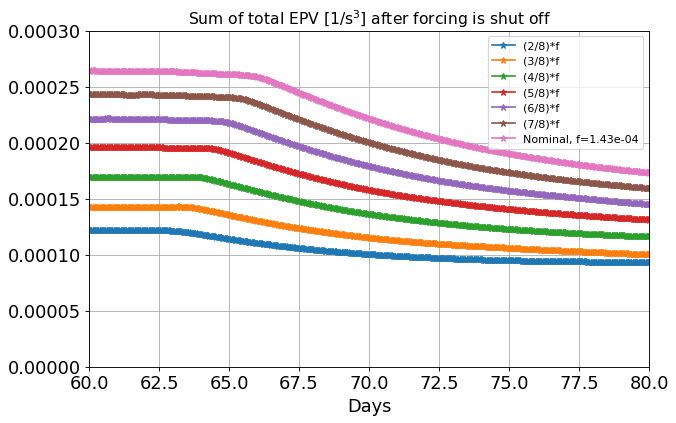

In [105]:
#plt.clear()
fig = plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)


plt.plot(np.linspace(60,80,480),var1[0][0:480],'-*')
plt.plot(np.linspace(60,80,480),var1[1][0:480],'-*')
plt.plot(np.linspace(60,80,480),var1[6][0:480],'-*')
plt.plot(np.linspace(60,80,480),var1[2][0:480],'-*')
plt.plot(np.linspace(60,80,480),var1[3][0:480],'-*')
plt.plot(np.linspace(60,80,480),var1[4][0:480],'-*')
plt.plot(np.linspace(60,80,480),var1[5][0:480],'-*')

plt.grid()
ax1.set_xlabel('Days',fontsize=16); 
ax1.tick_params(labelsize=16); #ax2.tick_params(labelsize=12);
ax1.set_title('Sum of total EPV [1/s$^3$] after forcing is shut off', fontsize=14)
ax1.legend(['(2/8)*f','(3/8)*f','(4/8)*f','(5/8)*f','(6/8)*f','(7/8)*f','Nominal, f=1.43e-04'])

ax1.set_ylim(0.000,0.0003)
ax1.set_xlim(60,80)
#plt.savefig('index%.3d'%i)

(60, 65)

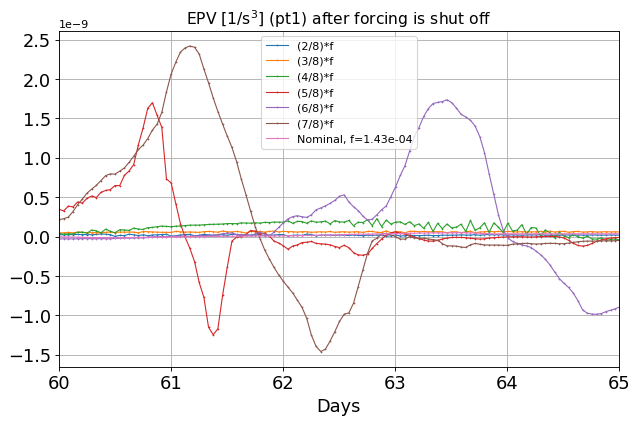

In [42]:
#plt.clear()
fig = plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)


plt.plot(np.linspace(60,80,480),pt1[0][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt1[1][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt1[6][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt1[2][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt1[3][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt1[4][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt1[5][0:480],'-*',linewidth=1,markersize=1)

plt.grid()
ax1.set_xlabel('Days',fontsize=16); 
ax1.tick_params(labelsize=16); #ax2.tick_params(labelsize=12);
ax1.set_title('EPV [1/s$^3$] (pt1) after forcing is shut off', fontsize=14)
ax1.legend(['(2/8)*f','(3/8)*f','(4/8)*f','(5/8)*f','(6/8)*f','(7/8)*f','Nominal, f=1.43e-04'])

#ax1.set_ylim(-1e-9,1e-9)
ax1.set_xlim(60,65)
#plt.savefig('index%.3d'%i)

(60, 65)

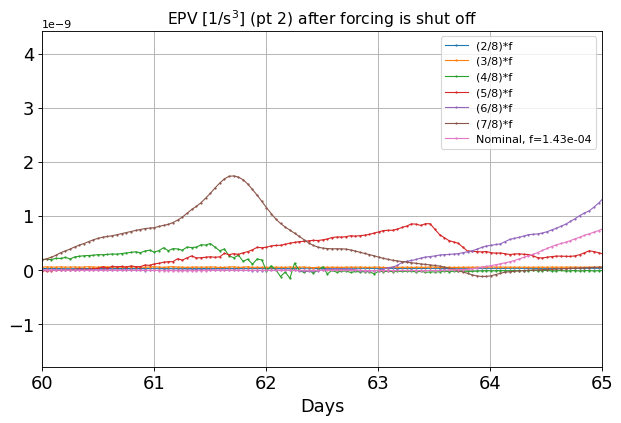

In [41]:
#plt.clear()
fig = plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)


plt.plot(np.linspace(60,80,480),pt2[0][0:480],'-o',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt2[1][0:480],'-o',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt2[6][0:480],'-o',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt2[2][0:480],'-o',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt2[3][0:480],'-o',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt2[4][0:480],'-o',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt2[5][0:480],'-o',linewidth=1,markersize=1)

plt.grid()
ax1.set_xlabel('Days',fontsize=16); 
ax1.tick_params(labelsize=16); #ax2.tick_params(labelsize=12);
ax1.set_title('EPV [1/s$^3$] (pt 2) after forcing is shut off', fontsize=14)
ax1.legend(['(2/8)*f','(3/8)*f','(4/8)*f','(5/8)*f','(6/8)*f','(7/8)*f','Nominal, f=1.43e-04'])

#ax1.set_ylim(-1e-9,1e-9)
ax1.set_xlim(60,65)
#plt.savefig('index%.3d'%i)

(60, 65)

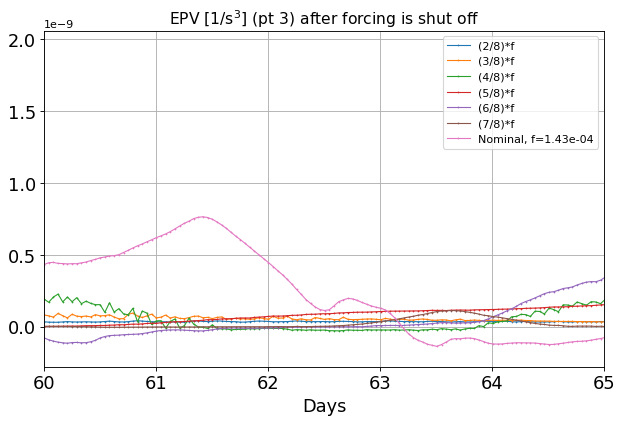

In [40]:
#plt.clear()
fig = plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)


plt.plot(np.linspace(60,80,480),pt3[0][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt3[1][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt3[6][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt3[2][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt3[3][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt3[4][0:480],'-*',linewidth=1,markersize=1)
plt.plot(np.linspace(60,80,480),pt3[5][0:480],'-*',linewidth=1,markersize=1)

plt.grid()
ax1.set_xlabel('Days',fontsize=16); 
ax1.tick_params(labelsize=16); #ax2.tick_params(labelsize=12);
ax1.set_title('EPV [1/s$^3$] (pt 3) after forcing is shut off', fontsize=14)
ax1.legend(['(2/8)*f','(3/8)*f','(4/8)*f','(5/8)*f','(6/8)*f','(7/8)*f','Nominal, f=1.43e-04'])

#ax1.set_ylim(-.5e-9,.5e-9)
ax1.set_xlim(60,65)
#plt.savefig('index%.3d'%i)